# To do:


# League of Legends Machine Learning

Load libraries and API key

In [1]:
import requests, json
import numpy as np
from src import API_io
import importlib
import pandas as pd
import pickle
import os
from src import feature_calc
import matplotlib.pyplot as plt
import src.plotting as lol_plt
%matplotlib inline
import pdb

In [4]:
working_dir = 'C:\\Users\\Me\\Documents\\GitHub\\lolML'
os.chdir(working_dir)
with open(working_dir+ '\\api_key.txt', 'r') as api_file:
    api_key =  api_file.read()

In [100]:
os.chdir(working_dir)
with open('EUW combined_df.pickle', 'rb') as pickle_file:
    euw_timelines_df = pickle.load(pickle_file)
with open('KR combined_df.pickle', 'rb') as pickle_file:
    kr_timelines_df = pickle.load(pickle_file)
with open('NA combined_df.pickle', 'rb') as pickle_file:
    na_timelines_df = pickle.load(pickle_file)
with open('Low ELO combined_df.pickle', 'rb') as pickle_file:
    low_timelines_df = pickle.load(pickle_file)

In [6]:
# load sklearn package 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

In [101]:
euw_timelines_df = [feature_calc.calc_secondary_features(x) for x in euw_timelines_df]
na_timelines_df = [feature_calc.calc_secondary_features(x) for x in na_timelines_df]
kr_timelines_df = [feature_calc.calc_secondary_features(x) for x in kr_timelines_df]
low_timelines_df = [feature_calc.calc_secondary_features(x) for x in low_timelines_df]
euw_timelines_df = feature_calc.calc_second_diff(euw_timelines_df)
na_timelines_df = feature_calc.calc_second_diff(na_timelines_df)
kr_timelines_df = feature_calc.calc_second_diff(kr_timelines_df)
low_timelines_df = feature_calc.calc_second_diff(low_timelines_df)

In [114]:
champ_timelines_df = na_timelines_df
champ_timelines_df = feature_calc.binarize_champions( champ_timelines_df )

In [8]:
important_col = ['blue_inhibs', 'blue_barons', 'drag_diff', 'first_baron', 'first_inhib',
                 'gold_diff', 'gold_diff_diff', 'kill_diff', 'kill_diff_diff', 'red_barons',
                 'red_inhibs', 'tower_diff']
timeline_end = 55
time_indices = np.arange(5, timeline_end, 5)

In [9]:
import matplotlib as mpl
mpl.rc('font', size=20)
mpl.rc('lines', linewidth=2)

# Get summoner names, and list of matches

Load featured games, and get a list of summoner_names

In [144]:
# variables for classifiers
#col_names = feature_calc.col_names
col_names = test_timelines_df[0].columns
champ_col = np.array([x for x in col_names if x not in
             ['winner', 'game_length', 'blue_0', 'blue_1', 'blue_2', 'blue_3', 'blue_4',
              'red_0', 'red_1', 'red_2', 'red_3', 'red_4', 'matchId', 'utctimestamp'] ])
num_features = np.size(champ_col)
print(champ_col, )

['first_dragon' 'drag_diff' 'total_drag' 'first_baron' 'blue_barons'
 'red_barons' 'first_tower' 'tower_diff' 'total_tower' 'first_inhib'
 'blue_inhibs' 'red_inhibs' 'first_blood' 'gold_diff' 'kill_diff'
 'total_kill' 'blue_share' 'red_share' 'surrender' 'square_gold_diff'
 'gold_diff_diff' 'tower_diff_diff' 'kill_diff_diff' 'drag_diff_diff'
 'blue_5' 'blue_6' 'blue_7' 'blue_8' 'blue_9' 'blue_10' 'blue_11' 'blue_12'
 'blue_13' 'blue_14' 'blue_15' 'blue_16' 'blue_17' 'blue_18' 'blue_19'
 'blue_20' 'blue_21' 'blue_22' 'blue_23' 'blue_24' 'blue_25' 'blue_26'
 'blue_27' 'blue_28' 'blue_29' 'blue_30' 'blue_31' 'blue_32' 'blue_33'
 'blue_34' 'blue_35' 'blue_36' 'blue_37' 'blue_38' 'blue_39' 'blue_40'
 'blue_41' 'blue_42' 'blue_43' 'blue_44' 'blue_45' 'blue_48' 'blue_50'
 'blue_51' 'blue_53' 'blue_54' 'blue_55' 'blue_56' 'blue_57' 'blue_58'
 'blue_59' 'blue_60' 'blue_61' 'blue_62' 'blue_63' 'blue_64' 'blue_67'
 'blue_68' 'blue_69' 'blue_72' 'blue_74' 'blue_75' 'blue_76' 'blue_77'
 'blue_78' '

In [140]:
champ_forest = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=20,max_features='sqrt')
def cross_validate_score(cur_df, input_col):
    return cross_validation.cross_val_score(champ_forest, cur_df[input_col], cur_df['winner'], cv=3, n_jobs = 2)

In [141]:
champ_scores = [ cross_validate_score( x, train_col) for x in test_timelines_df]
simple_scores = [ cross_validate_score( x, important_col) for x in test_timelines_df]

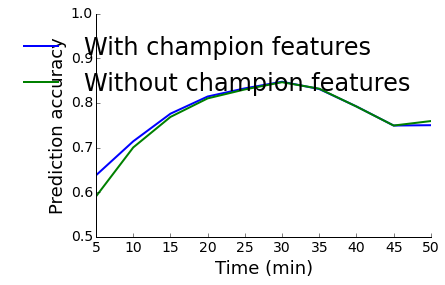

In [142]:
plt.plot(time_indices, np.mean(champ_scores, 1), label = 'With champion features')
plt.plot(time_indices, np.mean(simple_scores, 1), label = 'Without champion features')
plt.ylim( 0.5, 1)
plt.xlabel('Time (min)', fontsize = 18)
plt.ylabel('Prediction accuracy', fontsize = 18)
plt.xticks(time_indices)
lol_plt.prettify_axes(plt.gca())
plt.legend(frameon=False);

In [138]:
important_col = ['blue_inhibs', 'blue_barons', 'drag_diff', 'first_baron', 'first_inhib',
                 'gold_diff', 'gold_diff_diff', 'kill_diff', 'kill_diff_diff', 'red_barons',
                 'red_inhibs', 'tower_diff']

In [128]:
champ_scores

[array([ 0.64305474,  0.6403119 ,  0.63041838]),
 array([ 0.71257234,  0.71395017,  0.70916869]),
 array([ 0.77282324,  0.77565673,  0.77565673]),
 array([ 0.81026573,  0.81560038,  0.81767812]),
 array([ 0.83184069,  0.82832754,  0.83517757]),
 array([ 0.83882784,  0.85062007,  0.85287486]),
 array([ 0.8218279 ,  0.83203695,  0.83296864]),
 array([ 0.76705757,  0.79626667,  0.80256137]),
 array([ 0.73488372,  0.74728682,  0.76242236]),
 array([ 0.73333333,  0.71666667,  0.78333333])]

In [132]:
na_timelines_df[0].shape

(35783, 36)

In [134]:
champ_forest.fit(test_timelines_df[2][train_col], test_timelines_df[2]['winner'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
train_col

array(['first_dragon', 'drag_diff', 'total_drag', 'first_baron',
       'blue_barons', 'red_barons', 'first_tower', 'tower_diff',
       'total_tower', 'first_inhib', 'blue_inhibs', 'red_inhibs',
       'first_blood', 'gold_diff', 'kill_diff', 'total_kill', 'blue_share',
       'red_share', 'surrender', 'square_gold_diff', 'gold_diff_diff',
       'tower_diff_diff', 'kill_diff_diff', 'drag_diff_diff', 'blue_5',
       'blue_6', 'blue_7', 'blue_8', 'blue_9', 'blue_10', 'blue_11',
       'blue_12', 'blue_13', 'blue_14', 'blue_15', 'blue_16', 'blue_17',
       'blue_18', 'blue_19', 'blue_20', 'blue_21', 'blue_22', 'blue_23',
       'blue_24', 'blue_25', 'blue_26', 'blue_27', 'blue_28', 'blue_29',
       'blue_30', 'blue_31', 'blue_32', 'blue_33', 'blue_34', 'blue_35',
       'blue_36', 'blue_37', 'blue_38', 'blue_39', 'blue_40', 'blue_41',
       'blue_42', 'blue_43', 'blue_44', 'blue_45', 'blue_48', 'blue_50',
       'blue_51', 'blue_53', 'blue_54', 'blue_55', 'blue_56', 'blue_57',
     